In [44]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Probability

Let's calculate the probability of getting at least one head out of k coin flips, where k goes from 1 to 50.

In [ ]:
toss = np.arange(1, 51, 1)
results = Table().with_columns(
    "Toss", toss,
    "Chance of at least one Head", 1 - (1/2)**toss)
results

In [ ]:
# let's visualize the results with a scatter plot
results.scatter("Toss")

## Random Sampling ##

Let's suppose our population is United Airlines domestic flights departing from San Francisco in the summer of 2015; i.e., United Airlines flights departing from San Francisco from 6/1/15 to 8/9/15.

Below we load this population of data and then sample from it using different methods. 


In [58]:
# United Airlines domestic flights departing from San Francisco in the summer of 2015
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [53]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [10]:
# Deterministic sample
united.take(make_array(999, 1000, 1001))

Row,Date,Flight Number,Destination,Delay
999,6/7/15,1684,LIH,-3
1000,6/7/15,1692,EWR,7
1001,6/7/15,1699,ATL,6


In [11]:
# Systematic sample 
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
969,6/7/15,1247,SAN,0
1969,6/14/15,408,IAD,-1
2969,6/20/15,1709,ORD,2
3969,6/27/15,653,LAX,-5
4969,7/4/15,734,ORD,11
5969,7/10/15,1957,MCO,122
6969,7/17/15,1216,LAS,5
7969,7/24/15,322,IAH,89
8969,7/30/15,1526,SEA,-2
9969,8/6/15,294,DFW,41


In [73]:
# simple random sample
random_row_nums = np.random.choice(np.arange(united.num_rows), 10, replace = False)
random_row_nums

united.take(random_row_nums)


Row,Date,Flight Number,Destination,Delay
4904,7/3/15,1723,KOA,-7
13420,8/28/15,2000,PHX,-9
4743,7/2/15,1263,MCO,8
5354,7/7/15,394,LAS,-8
3416,6/23/15,1637,SEA,-4
2323,6/16/15,1122,HNL,12
6529,7/14/15,1671,SAN,175
8134,7/25/15,331,DEN,0
2009,6/14/15,1118,EWR,5
2171,6/15/15,1197,IAH,112


## Probability distributions ##

Let's look at the probability distribution for rolling a fair six-sided die and how the empirical distribution is a good approximation when the sample size gets large. 


In [12]:
# Options for a six-side die
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [13]:
# Table method .sample() draws at random with replacement 
# from the rows of a table (optional argument: with_replacement=False)
die.sample(10)

Face
6
1
6
4
2
5
4
3
6
5


In [14]:
# Setup bins for the die options (middle of bin are integers)
roll_bins = np.arange(0.5, 6.6, 1)
roll_bins

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

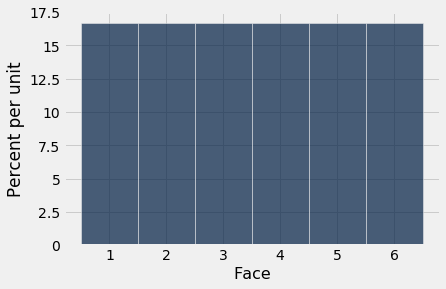

In [15]:
# Theoretical distribution (equal chance for each outcome)
die.hist(bins = roll_bins)

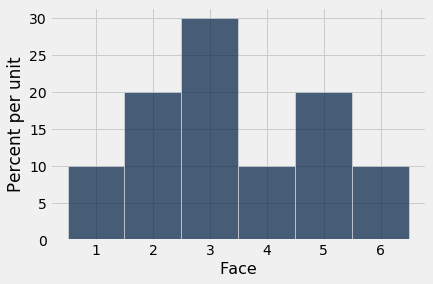

In [16]:
# Empirical distribution based on sample of size 10
die.sample(10).hist(bins = roll_bins)

## Large Random Samples ##

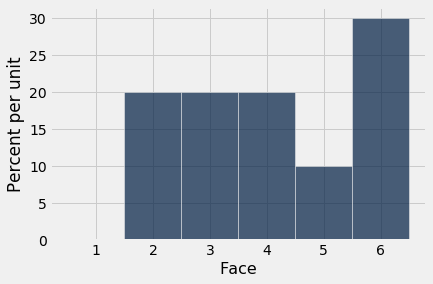

In [17]:
# Another empirical distribution based on sample of size 10
die.sample(10).hist(bins = roll_bins)

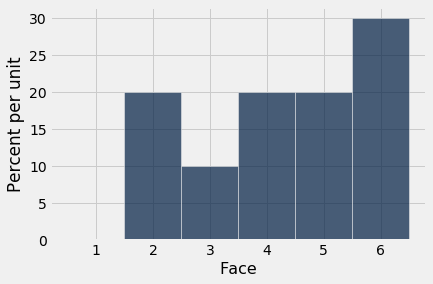

In [18]:
# And another (distributions change quite a bit)
die.sample(10).hist(bins = roll_bins)

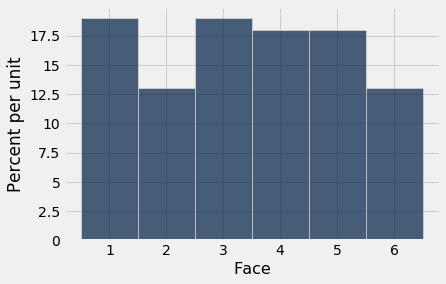

In [19]:
# Increase sample size to 100
die.sample(100).hist(bins = roll_bins)

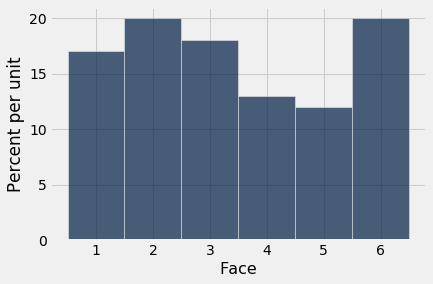

In [20]:
# Another empirical  distribution with a sample size of 100
# These appear more stable than with a sample size of 10
die.sample(100).hist(bins = roll_bins)

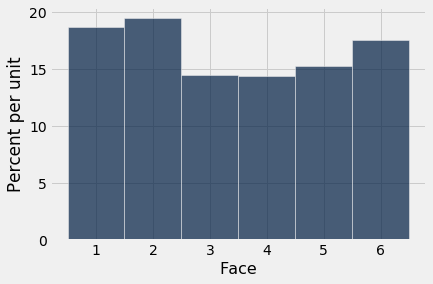

In [21]:
# Sample size of 1000
die.sample(1000).hist(bins = roll_bins)

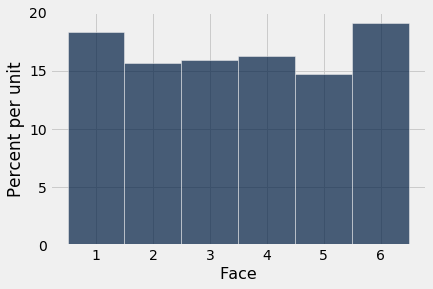

In [22]:
# Another with a sample size of 1000
# More stable than those with a sample size of 10 or 100
# Closer to the theoretical distribution (equal probabilities)
die.sample(1000).hist(bins = roll_bins)

## Sampling from the population of United flight delays

If we view the flight delays of United Airline flights from San Francisco as a population, we can plot the distribution of this population as a histogram. 

If we take large enough samples from this population, the histogram of these samples (empirical distributions) will resemble the population of all flight delays. 


In [24]:
# Let's get back to the United flight delay data. Recall the column headers:
united.show(5)

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64


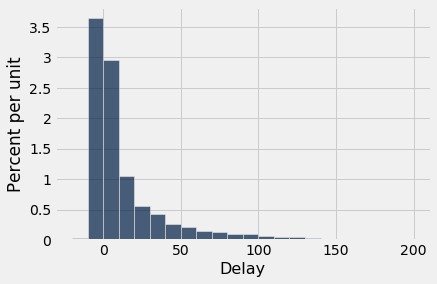

In [25]:
# Plot a histogram of the delays. Since we are viewing the delays in the data set as a population, 
# this is the probability distribution of the delays 

# (side note: we will be the data using bins at: np.arange(-20, 201, 10)
# This binning scheme does not display about 0.8% of the data with extreme delays, 
# but makes it easier to see the majority of "shape" of the probability distribution)

united.hist('Delay', bins = np.arange(-20, 201, 10))

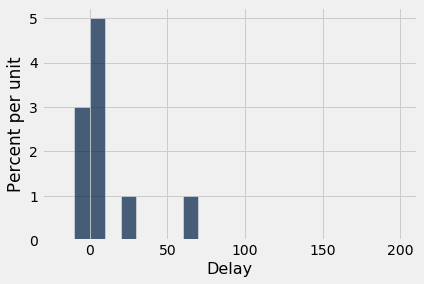

In [29]:
# let's draw a sample of size 10 from the population of flight delays and view the corresponding empirical distributions
united.sample(10).hist('Delay', bins = np.arange(-20, 201, 10))

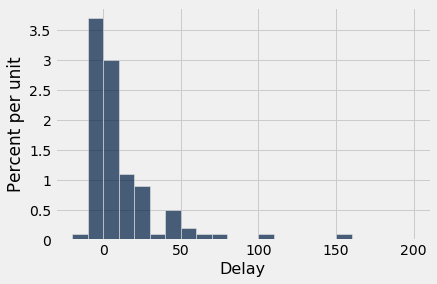

In [32]:
# Another empirical distribution with a sample size of 100
united.sample(100).hist('Delay', bins = np.arange(-20, 201, 10))

## Simulating Statistics ##

In [33]:
# Considering united as a population
# The population median delay is:
np.median(united.column('Delay'))

2.0

In [34]:
# Percentage of data less than or equal to the median
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

In [70]:
# What if we take a random sample of size 30 - what's the estimated median?
np.median(united.sample(30).column('Delay'))

4.5

In [71]:
# Simulate the empirical distribution of the median (statistic) using a sample size of 30
# We generate 10000 samples of size 30 (there will be 10000 estimates of the median)
# This cell takes a few seconds to run
medians = make_array()

for i in np.arange(10000):
    new_median = np.median(united.sample(30).column('Delay'))
    medians = np.append(medians, new_median)

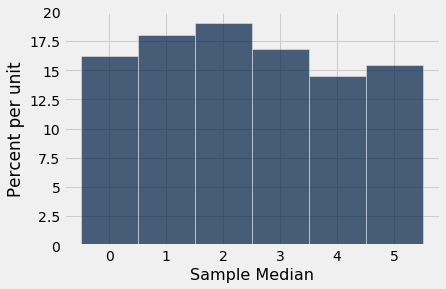

In [72]:
# Display the empirical distribution of the median as a histogram
Table().with_column('Sample Median', medians).hist(bins = np.arange(-0.5, 5.6, 1))